In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)
    
from common.read_COMSOL_data import *

In [2]:
CURR_PATH = os.getcwd()
DATA_PATH = os.path.join(CURR_PATH, 'data')
FILE_NAME = "20171013_lfo_dw_result.csv"
FILE_PATH = os.path.join(DATA_PATH, FILE_NAME)
sim_data = read_COMSOL_csv(FILE_PATH, name_list=['domain_cdt', 'dw_cdt', 'y21_imag', 'y21_real'])

In [3]:
sim_data.head()

,domain_cdt,dw_cdt,y21_imag,y21_real
0,0.092087,0.010000,-493.395098,-8.423507
1,0.092087,0.017783,-493.395668,-8.429803
2,0.092087,0.031623,-493.396695,-8.440997
3,0.092087,0.056234,-493.398557,-8.460899
4,0.092087,0.100000,-493.401982,-8.496272


In [4]:
sim_data['domain_cdt'].value_counts()

0.398058    25
0.577952    25
0.087710    25
0.092087    25
0.144186    25
Name: domain_cdt, dtype: int64

In [5]:
domain_cdt_list = sorted(list(sim_data['domain_cdt'].value_counts().index))
conditions = {'domain_cdt': 0}

In [6]:
import pandas as pd
# 0: domain_cdt_list, 1: y21_imag, 2: y21_real, 3: dw_cdt, 4: ratio
result = [domain_cdt_list, [], [], [], []]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(len(domain_cdt_list)):
    conditions['domain_cdt'] = domain_cdt_list[i]
    sim_data_section = get_sub_dataframe(sim_data, conditions)
    y21_imag = -1 * (sim_data_section['y21_imag'].values - sim_data_section['y21_imag'].values[0])
    y21_real = -1 * (sim_data_section['y21_real'].values - sim_data_section['y21_real'].values[0])
    result[1].append(y21_imag)
    result[2].append(y21_real)
    result[3].append(sim_data_section['dw_cdt'].values)
    result[4].append(y21_real / y21_imag)

C:\Users\Wu\.edm\envs\lab-data\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in divide


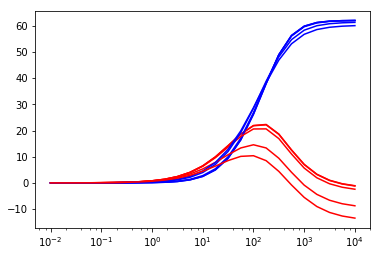

In [8]:
for i in range(len(domain_cdt_list)):
    plt.plot(result[3][i], result[1][i], 'b-', result[3][i], result[2][i], 'r-')
plt.xscale('log')

(0, 1.5)

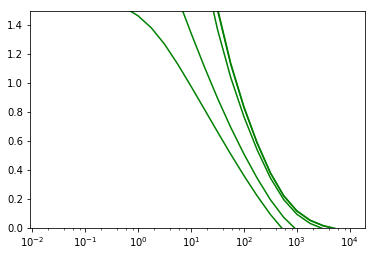

In [9]:
for i in range(len(domain_cdt_list)):
    plt.plot(result[3][i], result[4][i], 'g-')
plt.xscale('log')
plt.ylim(0, 1.5)

In [10]:
dw_signal_ratio = [0.345, 0.412, 0.396, 0.487, 0.502]
dw_signal_ratio2 = [0.295, 0.395, 0.398, 0.579, 0.734]
from common.data_analysis import *
for i in range(len(domain_cdt_list)):
    print from_y_to_x(result[3][i][1:], result[4][i][1:], dw_signal_ratio[i], 10)

355.517430009
285.112970463
268.634548795
108.196764814
57.9003148352


In [14]:
from common.data_analysis import *
for i in range(len(domain_cdt_list)):
    print from_y_to_x(result[3][i][1:], result[4][i][1:], dw_signal_ratio2[i], 10)

422.095343384
300.428868686
266.959666176
80.096135065
24.4360803871


In [12]:
from_y_to_x(numpy.log10(result[3][0])[1:], result[4][0][1:], dw_signal_ratio[0], 1)

2.5511455965171472